# BREAST Cancer - FA and 10 features - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_FA_10Factors.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,F2,F7,F8,F1,F5,F6,F4,F3,F10,F9
0,0.725408,0.860359,-0.805756,1.236246,-0.974475,-0.429426,-0.036111,1.683856,1.657512,0.615753
1,1.313731,-0.445149,-0.774061,-0.627645,-0.336003,0.032901,-1.270643,0.632678,-1.300007,0.748573
2,0.515401,1.653121,0.481797,0.025628,0.469539,1.017801,-0.036060,-0.038639,-0.027953,0.809278
3,1.549520,-1.237352,-0.334815,-0.702593,-1.670914,1.961418,-1.257837,1.713454,-1.016170,0.322448
4,0.494648,1.427875,-0.578348,0.636503,0.571920,-0.815834,-0.051139,0.490589,0.873456,-1.043810


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[10  7]
 [ 1 50]]
0.8823529411764706
0.7843137254901961
0.9259259259259259
0.8771929824561403
0.9803921568627451
0.8419838523644751


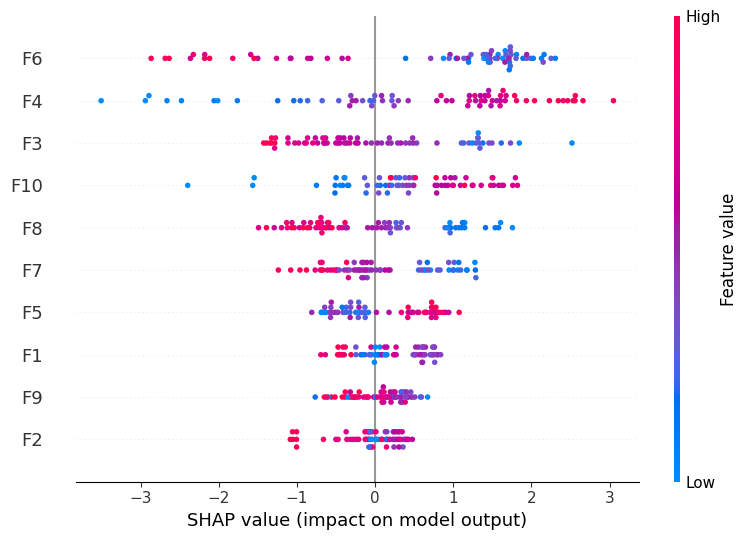

[[ 9  8]
 [ 3 48]]
0.8382352941176471
0.7352941176470589
0.897196261682243
0.8571428571428571
0.9411764705882353
0.798154555940023


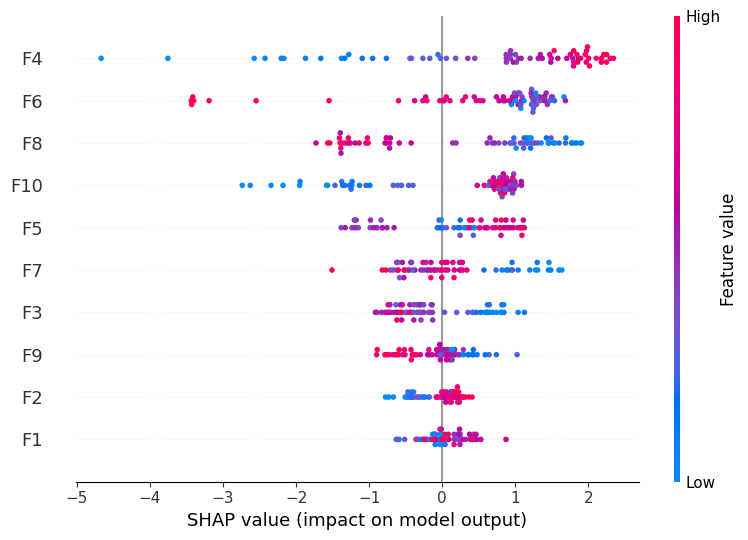

[[11  6]
 [ 7 44]]
0.8088235294117647
0.7549019607843137
0.8712871287128714
0.88
0.8627450980392157
0.8500576701268743


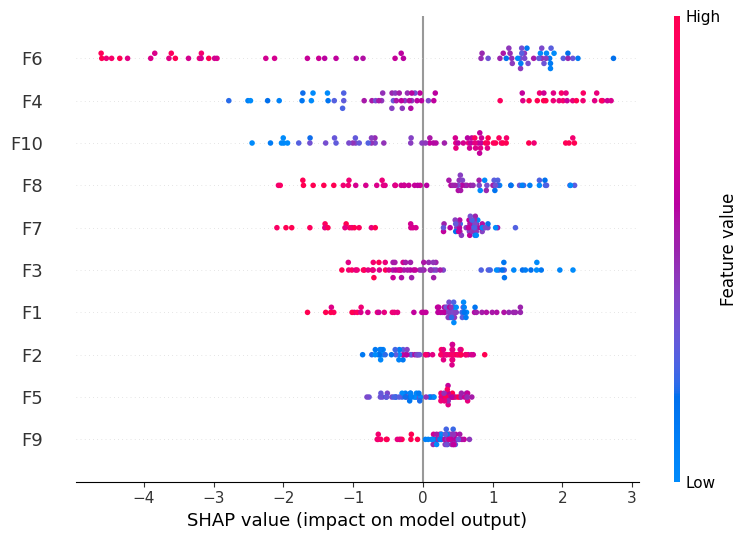

[[ 8  8]
 [ 4 47]]
0.8208955223880597
0.7107843137254901
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.9068627450980392


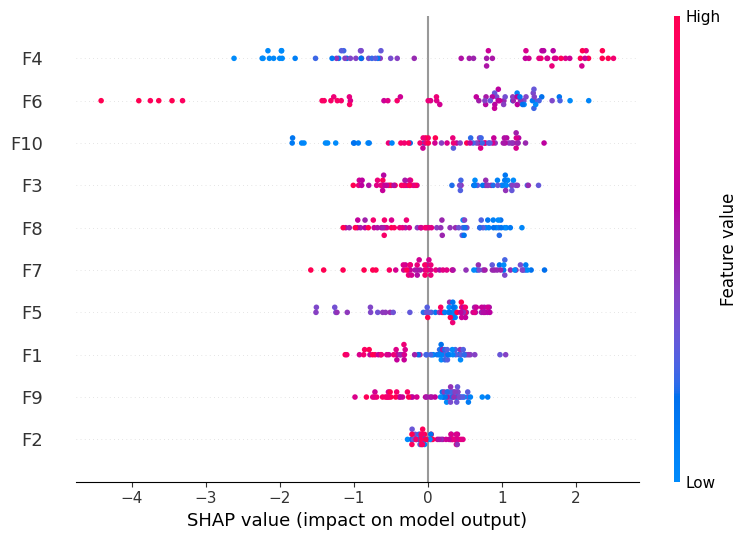

[[ 5 12]
 [ 5 46]]
0.75
0.5980392156862745
0.8440366972477066
0.7931034482758621
0.9019607843137255
0.8189158016147636


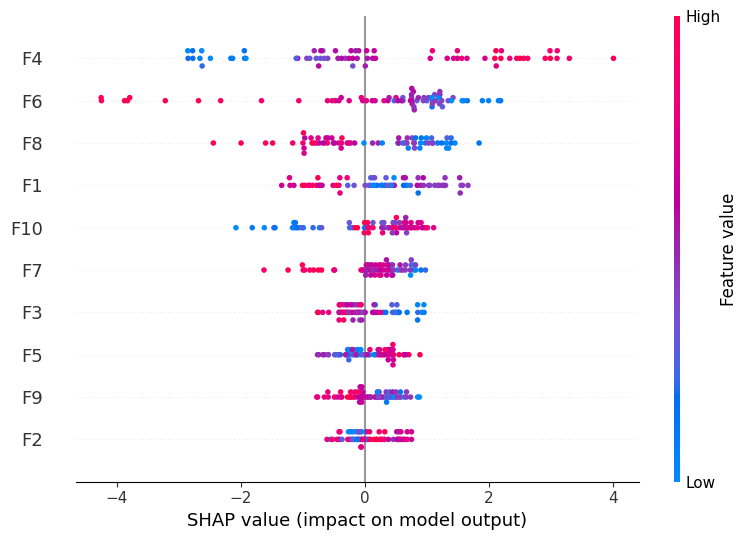

[[11  6]
 [ 6 45]]
0.8235294117647058
0.7647058823529411
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.8708189158016147


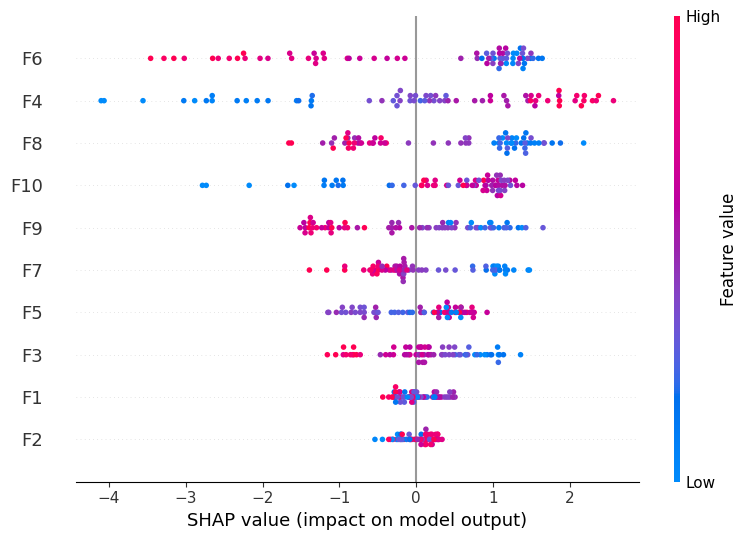

[[ 8  9]
 [ 4 47]]
0.8088235294117647
0.696078431372549
0.8785046728971961
0.8392857142857143
0.9215686274509803
0.8719723183391003


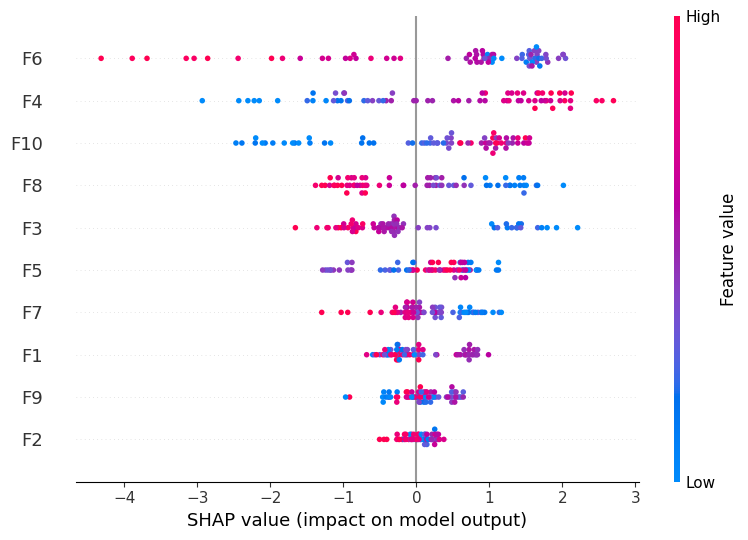

[[ 9  7]
 [ 3 48]]
0.8507462686567164
0.7518382352941176
0.9056603773584905
0.8727272727272727
0.9411764705882353
0.821078431372549


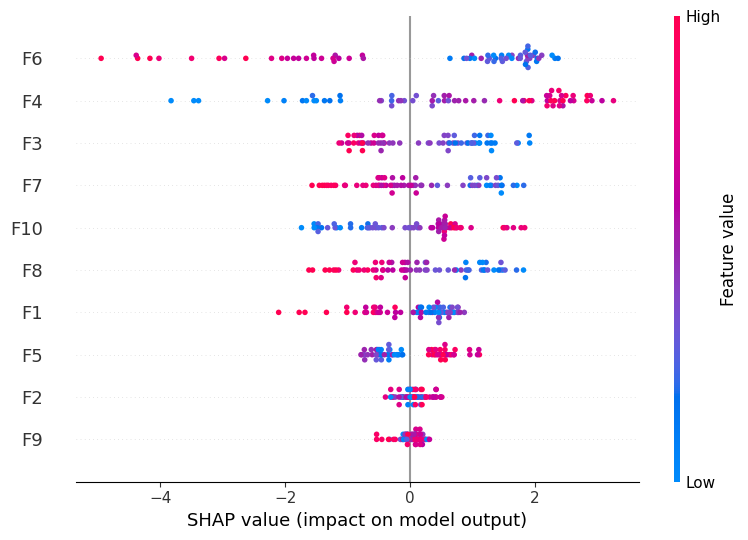

[[12  5]
 [ 3 48]]
0.8823529411764706
0.8235294117647058
0.923076923076923
0.9056603773584906
0.9411764705882353
0.8823529411764707


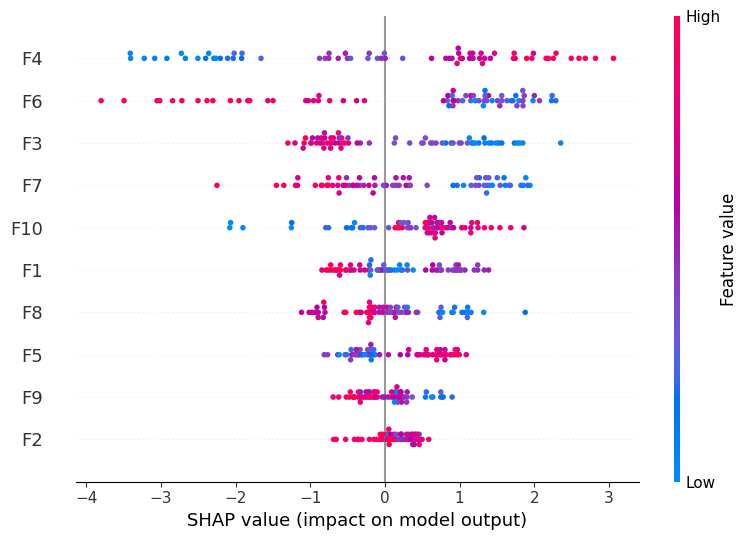

[[10  7]
 [ 5 46]]
0.8235294117647058
0.7450980392156863
0.8846153846153846
0.8679245283018868
0.9019607843137255
0.7785467128027682


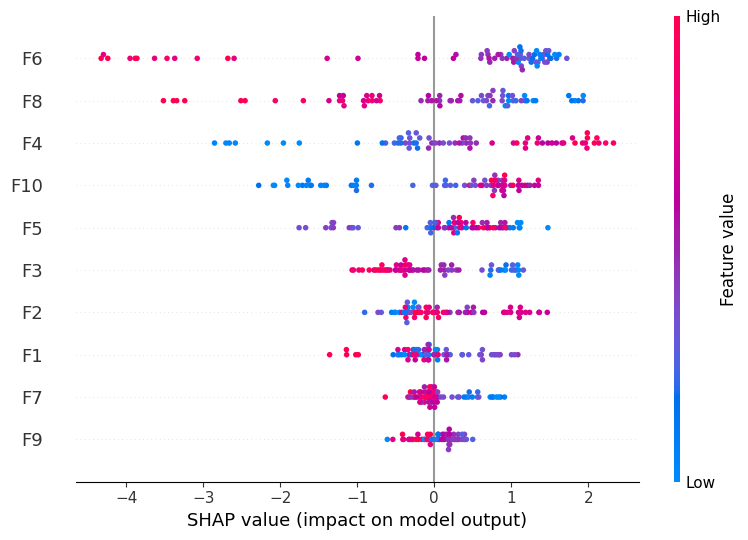

[[ 9  8]
 [ 4 47]]
0.8235294117647058
0.7254901960784313
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.8212226066897347


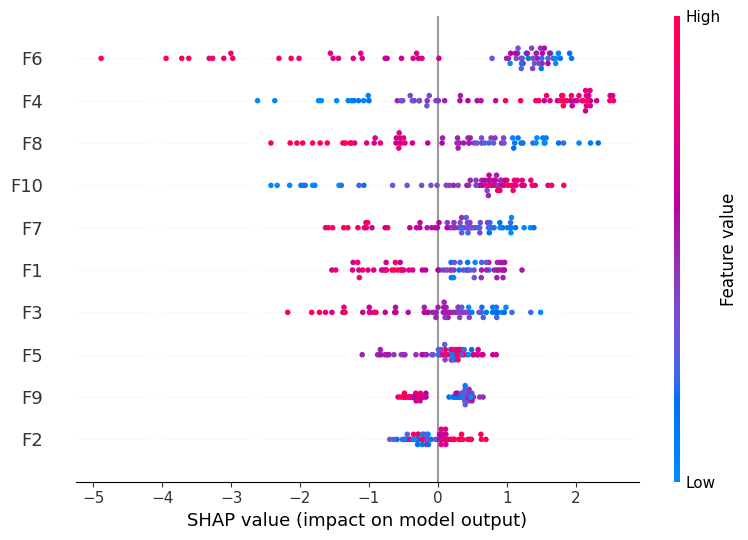

[[ 7  9]
 [ 5 46]]
0.7910447761194029
0.6697303921568627
0.8679245283018867
0.8363636363636363
0.9019607843137255
0.821078431372549


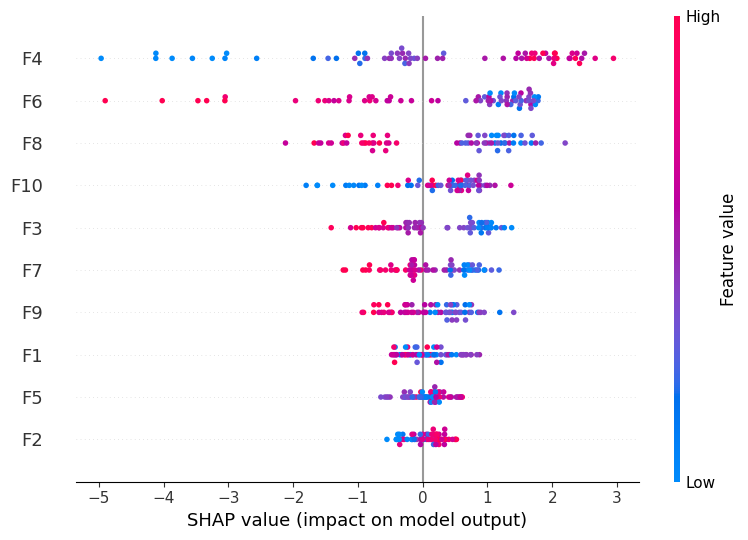

[[11  6]
 [ 4 47]]
0.8529411764705882
0.7843137254901961
0.9038461538461539
0.8867924528301887
0.9215686274509803
0.8592848904267588


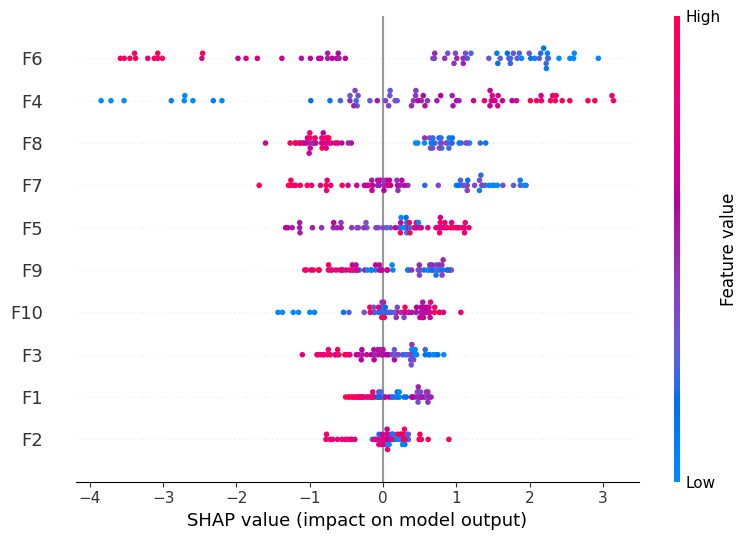

[[ 9  8]
 [ 4 47]]
0.8235294117647058
0.7254901960784313
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.8500576701268743


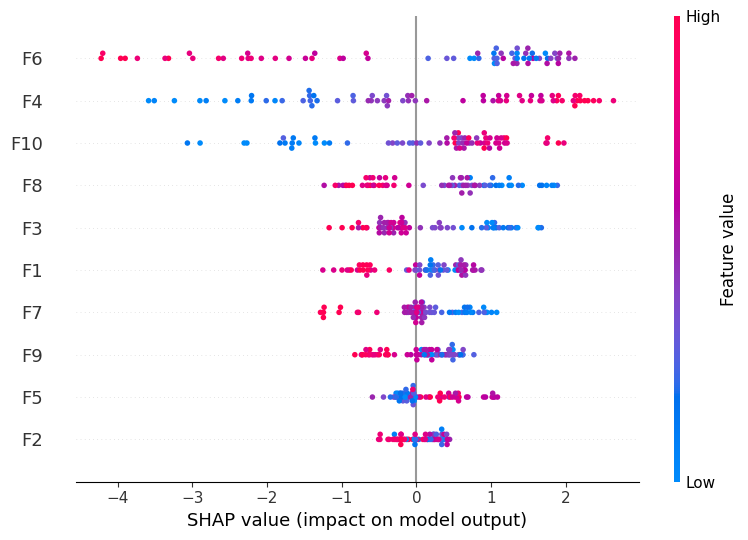

[[ 9  8]
 [ 1 50]]
0.8676470588235294
0.7549019607843137
0.9174311926605505
0.8620689655172413
0.9803921568627451
0.8662053056516724


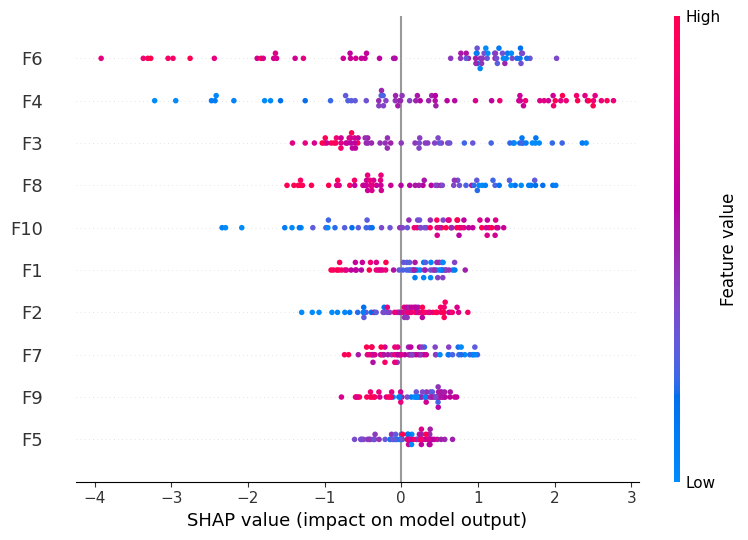

[[ 7  9]
 [ 3 48]]
0.8208955223880597
0.6893382352941176
0.8888888888888888
0.8421052631578947
0.9411764705882353
0.8590686274509804


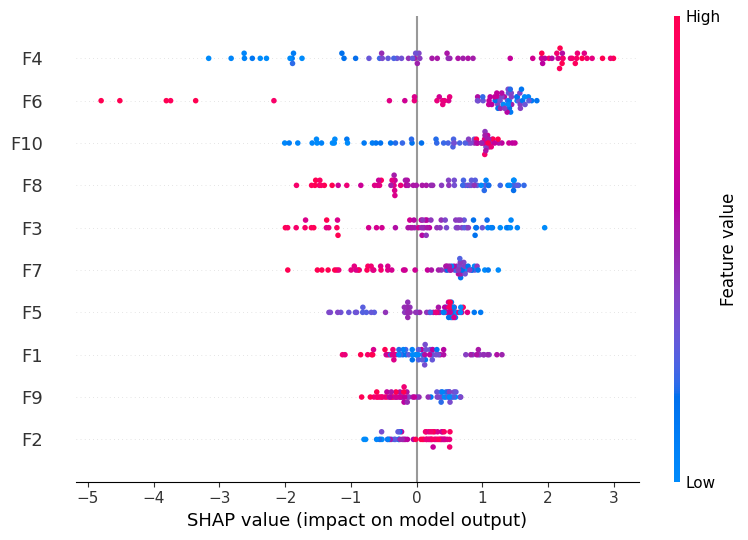

[[11  6]
 [ 5 46]]
0.8382352941176471
0.7745098039215687
0.8932038834951457
0.8846153846153846
0.9019607843137255
0.90080738177624


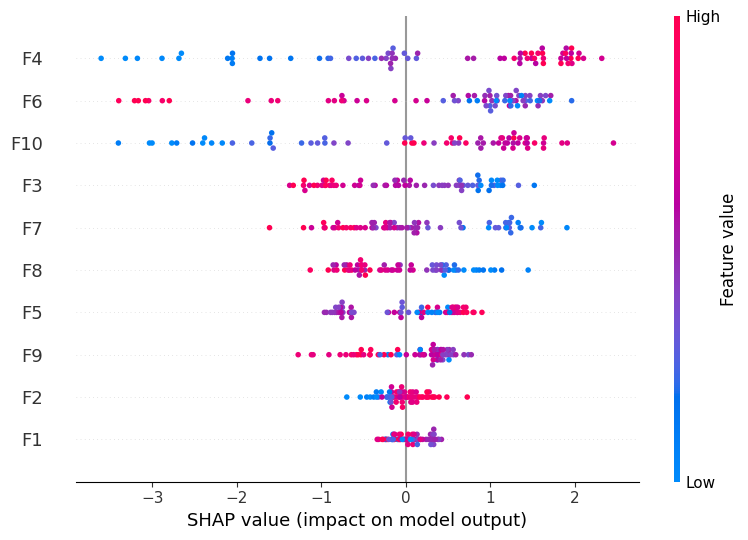

[[12  5]
 [ 4 47]]
0.8676470588235294
0.8137254901960784
0.9126213592233009
0.9038461538461539
0.9215686274509803
0.8777393310265282


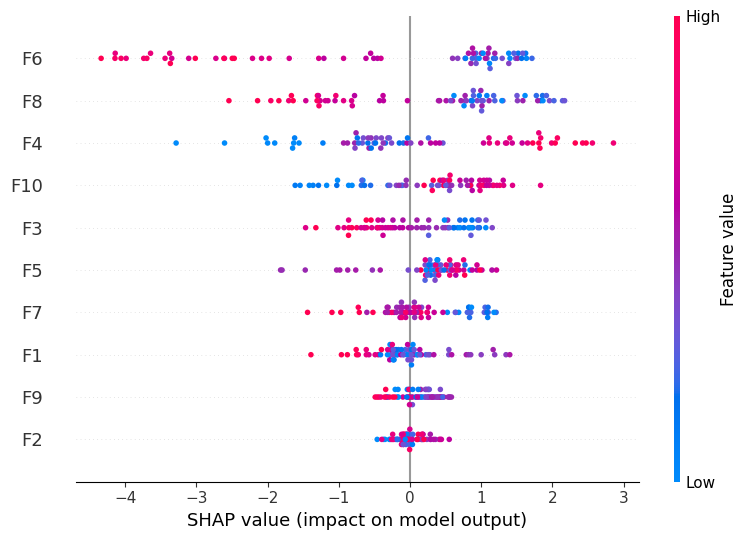

[[ 8  9]
 [ 2 49]]
0.8382352941176471
0.7156862745098039
0.8990825688073395
0.8448275862068966
0.9607843137254902
0.7773933102652826


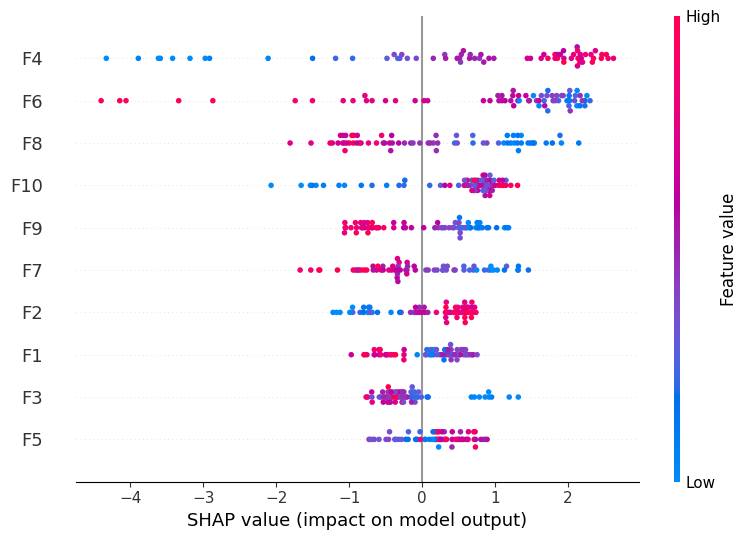

[[ 8  8]
 [ 2 49]]
0.8507462686567164
0.7303921568627452
0.9074074074074074
0.8596491228070176
0.9607843137254902
0.8762254901960784


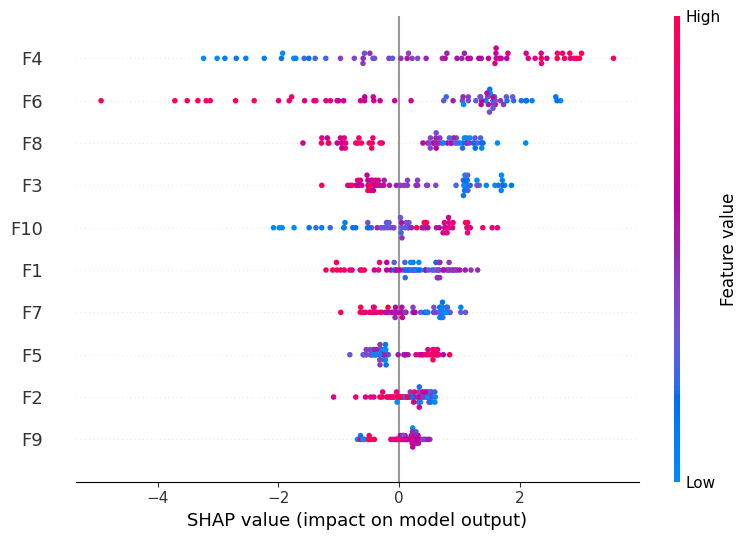

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.882353,0.784314,0.925926,0.877193,0.980392,0.841984,0.588235
fold2,0.838235,0.735294,0.897196,0.857143,0.941176,0.798155,0.529412
fold3,0.808824,0.754902,0.871287,0.88,0.862745,0.850058,0.647059
fold4,0.820896,0.710784,0.886792,0.854545,0.921569,0.906863,0.5
fold5,0.75,0.598039,0.844037,0.793103,0.901961,0.818916,0.294118
fold6,0.823529,0.764706,0.882353,0.882353,0.882353,0.870819,0.647059
fold7,0.808824,0.696078,0.878505,0.839286,0.921569,0.871972,0.470588
fold8,0.850746,0.751838,0.90566,0.872727,0.941176,0.821078,0.5625
fold9,0.882353,0.823529,0.923077,0.90566,0.941176,0.882353,0.705882
fold10,0.823529,0.745098,0.884615,0.867925,0.901961,0.778547,0.588235


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 83.3 (±3.1) 
The mean balanced accuracy is: 73.7 (±5.0) 
The mean precision is: 89.3 (±1.9) 
The mean recall is: 86.3 (±2.5) 
The mean F1 score is: 92.6 (±3.0) 
The mean ROC AUC is: 84.7 (±3.6) 
The mean specificity is: 54.8 (±10.0) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [76.9 ; 88.2]
The confidence interval for balanced accucary is [63.2 ; 81.9]
The confidence interval for precision is [85.5 ; 92.5]
The confidence interval for recall is [81.4 ; 90.5]
The confidence interval for F1 score is [87.2 ; 98.0]
The confidence interval for ROC AUC score is [77.8 ; 90.4]
The confidence interval for specificity score is [36.2 ; 70.6]
